In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
patients = pd.read_csv('../Data/healthcare-dataset-stroke-data.csv')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(patients.iloc[:, 1:-1], patients['stroke'], random_state=1,
                                                    stratify=patients['stroke'])

In [6]:
print(f"Percentage of samples that had a stroke: {round(np.mean(patients['stroke'])*100, 2)}%")
print(f"Percentage of samples in training set that had a stroke: {round(np.mean(y_train)*100, 2)}%")
print(f"Percentage of samples in test set that had a stroke: {round(np.mean(y_test)*100, 2)}%")

Percentage of samples that had a stroke: 4.87%
Percentage of samples in training set that had a stroke: 4.88%
Percentage of samples in test set that had a stroke: 4.85%


In [9]:
train = X_train.copy()
train['stroke'] = y_train.copy()
train.to_csv('../Data/train.csv', index=False)

test = X_test.copy()
test['stroke'] = y_test.copy()
test.to_csv('../Data/test.csv', index=False)

# Exploratory Data Analysis

In [5]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2045,Male,2.0,0,0,No,children,Rural,86.57,18.0,Unknown
4671,Male,19.0,0,0,No,Private,Rural,79.60,36.7,Unknown
3539,Male,11.0,0,0,No,children,Rural,68.62,18.2,Unknown
2002,Female,80.0,0,0,Yes,Self-employed,Rural,90.43,34.2,never smoked
5086,Female,51.0,0,0,Yes,Private,Urban,152.56,21.8,Unknown
...,...,...,...,...,...,...,...,...,...,...
2850,Female,50.0,0,0,No,Private,Urban,85.77,21.1,never smoked
1910,Female,5.0,0,0,No,children,Rural,59.61,17.1,Unknown
3064,Female,24.0,0,0,No,Private,Urban,149.17,23.1,never smoked
1511,Female,81.0,0,1,Yes,Private,Rural,123.49,30.7,smokes


In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3832 entries, 2045 to 4232
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3832 non-null   object 
 1   age                3832 non-null   float64
 2   hypertension       3832 non-null   int64  
 3   heart_disease      3832 non-null   int64  
 4   ever_married       3832 non-null   object 
 5   work_type          3832 non-null   object 
 6   Residence_type     3832 non-null   object 
 7   avg_glucose_level  3832 non-null   float64
 8   bmi                3674 non-null   float64
 9   smoking_status     3832 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 329.3+ KB


In [7]:
X_train.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,3832.000000,3832.000000,3832.000000,3832.000000,3674.000000
mean,42.870595,0.094207,0.053497,106.301944,28.803838
std,22.736944,0.292154,0.225051,45.226459,7.784806
min,0.080000,0.000000,0.000000,55.120000,11.500000
25%,24.000000,0.000000,0.000000,77.275000,23.500000
50%,44.000000,0.000000,0.000000,92.145000,28.000000
75%,61.000000,0.000000,0.000000,114.332500,32.900000
max,82.000000,1.000000,1.000000,271.740000,92.000000


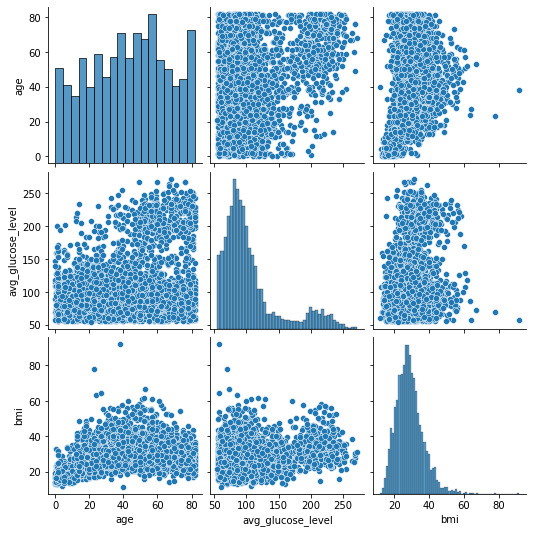

In [8]:
sns.pairplot(X_train[['age', 'avg_glucose_level', 'bmi']])

<AxesSubplot:>

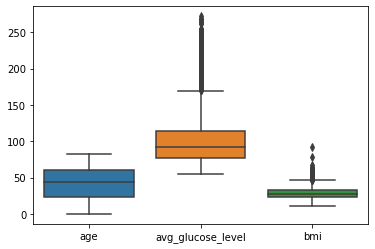

In [9]:
sns.boxplot(data=X_train[['age', 'avg_glucose_level', 'bmi']])

In [10]:
# Avg. Glucose Level Outliers
q1 = X_train.quantile(0.25)['avg_glucose_level']
q3 = X_train.quantile(0.75)['avg_glucose_level']
iqr = q3 - q1

print(f"Avg. Glucose Level Lower Threshold: {q1 - (1.5*iqr)}")
print(f"Avg. Glucose Level Upper Threshold: {q3 + (1.5*iqr)}")
X_train[(X_train['avg_glucose_level'] < q1-(1.5*iqr)) | (X_train['avg_glucose_level'] > q3+(1.5*iqr))]

Avg. Glucose Level Lower Threshold: 21.68875
Avg. Glucose Level Upper Threshold: 169.91875000000002


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2203,Female,56.0,0,0,Yes,Self-employed,Urban,242.94,41.2,never smoked
4986,Male,58.0,0,1,Yes,Private,Rural,225.35,26.5,smokes
277,Female,54.0,0,0,Yes,Private,Rural,206.72,26.7,never smoked
3548,Male,61.0,0,0,Yes,Govt_job,Rural,192.47,30.3,never smoked
3378,Male,51.0,0,0,No,Self-employed,Rural,219.17,29.8,never smoked
...,...,...,...,...,...,...,...,...,...,...
1596,Male,47.0,0,0,No,Private,Rural,237.17,NaN,Unknown
4028,Female,56.0,0,0,Yes,Private,Rural,200.98,30.4,smokes
343,Male,64.0,0,0,Yes,Govt_job,Urban,239.64,34.6,formerly smoked
2383,Male,55.0,0,0,Yes,Private,Rural,232.81,28.8,Unknown


In [11]:
# BMI Outliers
q1 = X_train.quantile(0.25)['bmi']
q3 = X_train.quantile(0.75)['bmi']
iqr = q3 - q1

print(f"BMI Lower Threshold: {q1 - (1.5*iqr)}")
print(f"BMI Upper Threshold: {q3 + (1.5*iqr)}")
X_train[(X_train['bmi'] < q1-(1.5*iqr)) | (X_train['bmi'] > q3+(1.5*iqr))]

BMI Lower Threshold: 9.400000000000002
BMI Upper Threshold: 47.0


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1077,Female,53.0,1,0,Yes,Private,Urban,87.03,55.2,formerly smoked
2277,Female,34.0,0,0,Yes,Private,Rural,83.53,48.5,formerly smoked
2764,Female,24.0,0,0,Yes,Private,Urban,85.55,63.3,never smoked
4154,Female,49.0,0,0,Yes,Private,Rural,125.63,57.2,Unknown
1003,Female,54.0,0,0,Yes,Private,Urban,85.22,50.2,never smoked
...,...,...,...,...,...,...,...,...,...,...
2441,Female,65.0,0,0,Yes,Govt_job,Urban,84.47,52.7,smokes
3606,Male,45.0,1,0,Yes,Self-employed,Rural,239.19,52.5,Unknown
3439,Female,68.0,0,0,Yes,Govt_job,Urban,228.05,51.9,Unknown
1061,Female,50.0,0,0,Yes,Private,Rural,206.25,53.4,formerly smoked


In [12]:
print("_____Gender_____\n", X_train['gender'].value_counts(), "\n")
print("_____Hypertension_____\n", X_train['hypertension'].value_counts(), "\n")
print("_____Heart Disease_____\n", X_train['heart_disease'].value_counts(), "\n")
print("_____Ever Married_____\n", X_train['ever_married'].value_counts(), "\n")
print("_____Work Type_____\n", X_train['work_type'].value_counts(), "\n")
print("_____Residence Type_____\n", X_train['Residence_type'].value_counts(), "\n")
print("_____Smoking Status_____\n", X_train['smoking_status'].value_counts())
print("_____Stroke_____\n", y_train.value_counts(), "\n")

_____Gender_____
 Female    2263
Male      1568
Other        1
Name: gender, dtype: int64 

_____Hypertension_____
 0    3471
1     361
Name: hypertension, dtype: int64 

_____Heart Disease_____
 0    3627
1     205
Name: heart_disease, dtype: int64 

_____Ever Married_____
 Yes    2481
No     1351
Name: ever_married, dtype: int64 

_____Work Type_____
 Private          2178
Self-employed     620
children          531
Govt_job          488
Never_worked       15
Name: work_type, dtype: int64 

_____Residence Type_____
 Urban    1924
Rural    1908
Name: Residence_type, dtype: int64 

_____Smoking Status_____
 never smoked       1421
Unknown            1164
formerly smoked     647
smokes              600
Name: smoking_status, dtype: int64
_____Stroke_____
 0    3645
1     187
Name: stroke, dtype: int64 



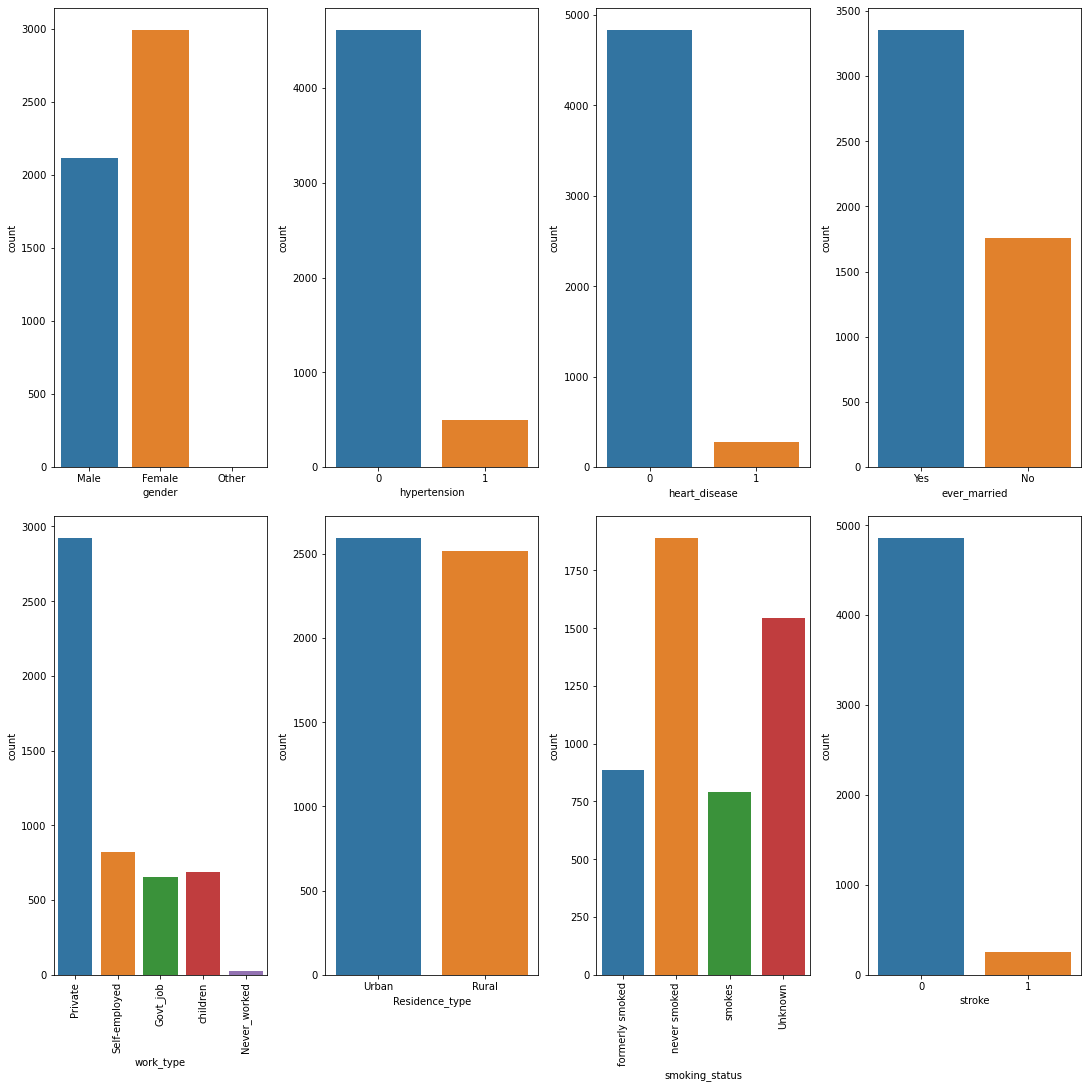

In [13]:
fig, ax = plt.subplots(2, 4, figsize=(15, 15), constrained_layout=True)

cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type',
             'smoking_status', 'stroke']
X_viz = X_train.copy()
X_viz['stroke'] = y_train.copy()

for idx, col in enumerate(cat_cols):
    sns.countplot(x=patients[col], ax=ax[int(np.floor(idx/4))][idx%4])

ax[1][0].tick_params(axis='x', labelrotation=90)
ax[1][2].tick_params(axis='x', labelrotation=90)

plt.show()

In [14]:
X_train[X_train['bmi'].isna()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1106,Female,71.0,1,0,Yes,Self-employed,Rural,66.12,NaN,never smoked
1836,Female,30.0,0,0,No,Govt_job,Urban,88.20,NaN,smokes
3945,Female,75.0,0,1,Yes,Self-employed,Urban,83.88,NaN,smokes
1427,Male,25.0,0,0,Yes,Private,Rural,78.29,NaN,smokes
903,Female,35.0,0,0,No,Govt_job,Urban,83.76,NaN,smokes
...,...,...,...,...,...,...,...,...,...,...
4283,Male,59.0,1,0,Yes,Govt_job,Rural,253.93,NaN,formerly smoked
129,Female,75.0,0,0,Yes,Govt_job,Urban,62.48,NaN,Unknown
64,Male,75.0,0,0,Yes,Private,Urban,104.72,NaN,Unknown
1596,Male,47.0,0,0,No,Private,Rural,237.17,NaN,Unknown


### Notes
- Outliers in Avg. Glucose and BMI features
- 158 rows with missing BMI values
- Heavy class skew